<a href="https://colab.research.google.com/github/PyBastian/ComputacionGrafica/blob/master/NotGenerico_Tarea_3_ML_2022_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398/578 Introducci√≥n al aprendizaje autom√°tico</h1>

<h4 align='center'><b>Tarea 3: Redes neuronales y ensamblados.</b></h4>


<h6 align='center'><b>Profesor:</b> Carlos Valle</h6>
<h6 align='center'><b>Ayudante:</b> Jean Aravena</h6>



<hr style="height:2px;border:none"/>

# **Tarea 3 üìÉ**

## **Temas**  

* Redes neuronales.
* Ensamblados.
* Random Forest, XGBoost, CatBoost.


## **Formalidades** 

* Equipos de trabajo de 2 personas.
* El entregable debe ser este mismo Jupyter Notebook incluyendo todos los resultados, los gr√°ficos realizados y las respuestas a las preguntas. 
* Se debe preparar una presentaci√≥n del trabajo realizado y sus hallazgos. El presentador ser√° elegido aleatoriamente y deber√° apoyarse en el Jupyter Notebook que entregar√°n.
* Formato de entrega: Subir a aula el Jupyter Notebook con el nombre NombreGrupo_Tarea_3_ML_2022_1
* Fecha de entrega y presentaciones: 22 de Julio. Hora l√≠mite de entrega: 14:30.
 

<hr style="height:2px;border:none"/>

La tarea se divide en 3 partes:

1.   Redes Neuronales.
2.   Ensamblados.
3.   Desaf√≠o.


La tarea tiene ejemplos de c√≥digos con los cuales pueden guiarse en gran parte, sin embargo, solo son gu√≠as y pueden ser creativos al momento de resolver la tarea. Tambi√©n en algunas ocasiones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una peque√±a justificaci√≥n de por qu√© su elecci√≥n es mejor o equivalente.

Recuerden intercalar su c√≥digo con comentarios y utilizar celdas Markdown en caso de que sea necesario para realizar an√°lisis, escribir f√≥rmulas o realizar explicaciones que les parezca relevante para justificar sus procedimientos. 

Noten que en general cuando se les pide elegir algo o proponer algo no se evaluar√° mucho la elecci√≥n en s√≠, en cambio la argumentaci√≥n detr√°s de la elecci√≥n ser√° lo m√°s ponderado.

*Se recomienda el uso de Google Colab para realizar la tarea.*

# Librerias üìö
 

Agregar cualquier otra librer√≠a que requiera para el desarrollo de la tarea.

In [ ]:
!pip install -q -U catboost
!pip install -q -U keras-tuner

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 76.6 MB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 135 kB 28.2 MB/s 


In [ ]:
import os
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, Loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
from sklearn.utils import resample

sns.set_theme()
warnings.filterwarnings('ignore')

# Utils ‚öôÔ∏è  

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

# Path to your folder
path = '/content/drive/MyDrive/Machine Learning/Data'

Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
# Set all seed.
def set_all_seed(seed=0):
  """Set the same seed for all the libraries that we use."""
  np.random.seed(seed)
  tf.random.set_seed(seed)

# Elegir cualquier semilla y siempre que se pueda utilizarla
# random_state = SEED
SEED = 2022

set_all_seed(seed=SEED)

# 1.1) Redes Neuronales üí£

<img src="https://drive.google.com/uc?id=12fnVpIB_qDJx_OVty7aWT1Ftw2o9r1Hl" width="60%"/>

[Referencia](https://purnasaigudikandula.medium.com/a-beginner-intro-to-neural-networks-543267bda3c8)

Para la creaci√≥n de redes neuronales generalmente existen dos bandos:


*   `Pytorch`
*   `Tensorflow`

Por un lado, tenemos a `Pytorch` que es mayormente utilizado en investigaci√≥n y por otro lado tenemos a `Tensorflow` que es mayormente utilizado en la industria. Ambos tienen la misma capacidad de abstracci√≥n y ambos son ampliamente aceptados y poseen una gran comunidad que los respalda.

Si nos vamos a una p√°gina bastante conocida como lo es [Papers With Code](https://paperswithcode.com/) podemos ver que desde la fecha `2018-03-01` hasta `2022-03-31` existe una tendencia creciente para el uso de `Pytorch` en t√©rminos de utilizaci√≥n en nuevos papers, es por ello por lo que en general si se va a realizar investigaci√≥n se recomienda `Pytorch`, pero ambos son √∫tiles y si sabes uno se hace m√°s f√°cil cambiarse de uno a otro. En introducci√≥n a las redes neuronales se utiliza `Tensorflow`, es por ello que tambi√©n emplearemos ese framework en esta tarea, pero como se mencion√≥ anteriormente no importa mucho cual aprendas porque te puedes cambiar cuando sea necesario.


<img src="https://drive.google.com/uc?id=1xVqc0kPI1TXmhMmsMJnxOiUsGAaqiYGP" width="80%"/>


[Referencia](https://paperswithcode.com/trends)

## Carga y exploraci√≥n de la data

In [ ]:
# Cargar la data que corresponde a un csv
PATH_TO_CSV = os.path.join(path, "tarea_3_house_price.csv")
df_data = pd.read_csv(PATH_TO_CSV)

<img src="https://drive.google.com/uc?id=13v7iUc8zmqlQ46aMfbtQ5dIEtDcdiNYx" width="50%"/>


Para la primera parte de la tarea trabajaremos con un dataset muy cl√°sico en ML el cual es [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction), que viene de `Kaggle`.

La data corresponde a 21.613 instancias las cuales tienen relaci√≥n con precios de casas en d√≥lares.

El dataset cuenta con 20 features las cuales est√°n dise√±adas para identificar ciertos patrones y con ello tratar de predecir el precio de una casa.

Features:

* `id`: Unique ID for each home sold
* `date`: Date of the home sale
* `bedrooms`: Number of bedrooms
* `bathrooms`: Number of bathrooms, where .5 accounts for a room with a toilet  but no shower
* `sqft_living`: Square footage of the apartments interior living space
* `sqft_lot`: Square footage of the land space
* `floors`: Number of floors
* `waterfront`: A dummy variable for whether the apartment was overlooking the waterfront or not
* `view`: An index from 0 to 4 of how good the view of the property was
* `condition`: An index from 1 to 5 on the condition of the apartment,
* `grade`: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* `sqft_above`: The square footage of the interior housing space that is above ground level
* `sqft_basement`: The square footage of the interior housing space that is below ground level
* `yr_built`: The year the house was initially built
* `yr_renovated`: The year of the house‚Äôs last renovation
* `zipcode`: What zipcode area the house is in
* `lat`: Lattitude
* `long`: Longitude
* `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors

Target:
* `price`: Price of each home sold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Como es usual realice un peque√±o EDA (Exploratory Data Analysis). Comente los resultados obtenidos** [2 Pts]

##An√°lisis datos

In [ ]:
df_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Primero se analizar√°n todas las variables que se sospecha que tengan una correlaci√≥n directa con el precio.

###Piezas

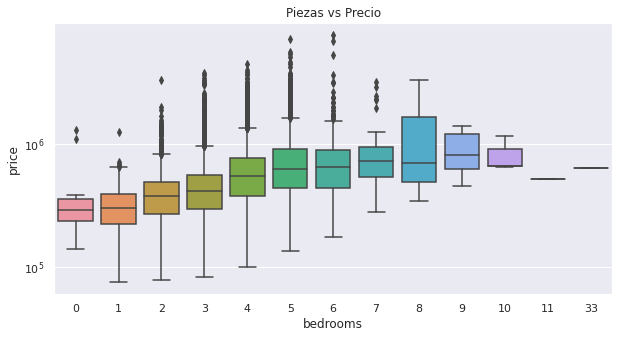

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(x="bedrooms", y="price", data=df_data)
plt.title("Piezas vs Precio")
plt.show()

Se puede ver que el n√∫mero de piezasb tiene una relaci√≥n directa con el precio entre 0 y 7 piezas. Para 8 o m√°s el valor se vuelve menos predecible.

###Ba√±os

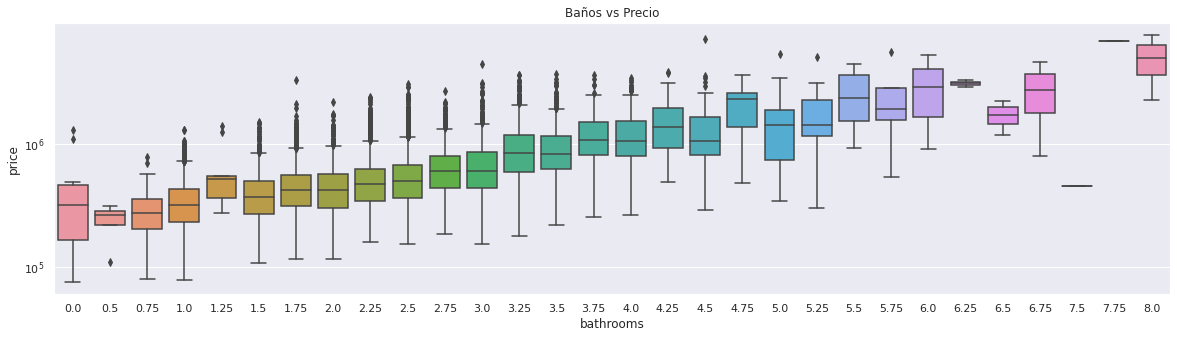

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.boxplot(x="bathrooms", y="price", data=df_data)
plt.title("Ba√±os vs Precio")
plt.show()

Se repite un patr√≥n similar al de las piezas, con una relaci√≥n relativamente directa para casas con entre 0.5 y 4.25 ba√±os

###Tama√±o Living y Terreno

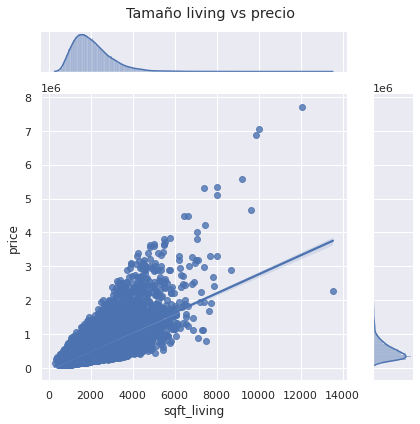

In [ ]:
p = sns.jointplot("sqft_living", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o living vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92) 

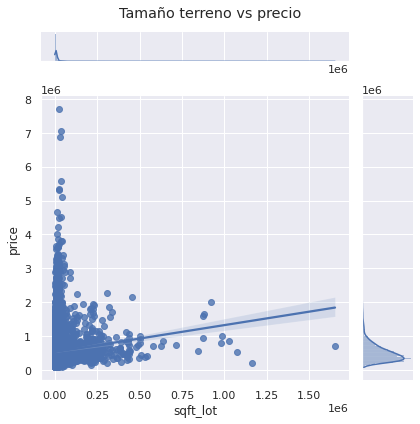

In [ ]:
p = sns.jointplot("sqft_lot", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o terreno vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92) 

En ambos se puedde ver una relaci√≥n directa entre el tama√±o y el precio. Sin embargo, existe una gran cantidad de outliers para terrenos peque√±os.

###Pisos

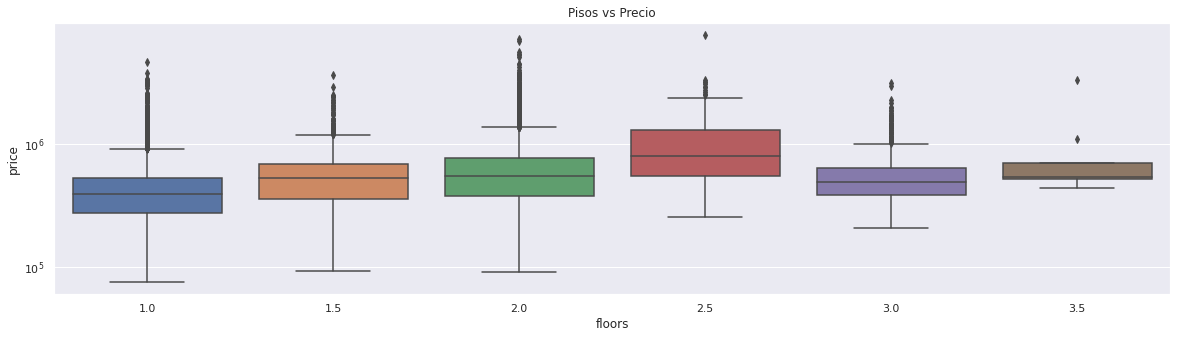

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.boxplot(x="floors", y="price", data=df_data)
plt.title("Pisos vs Precio")
plt.show()

Aqu√≠ la relaci√≥n es un poco tenue, y se mantiene solo hasta los 2.5 pisos.

### Vista y Condici√≥n

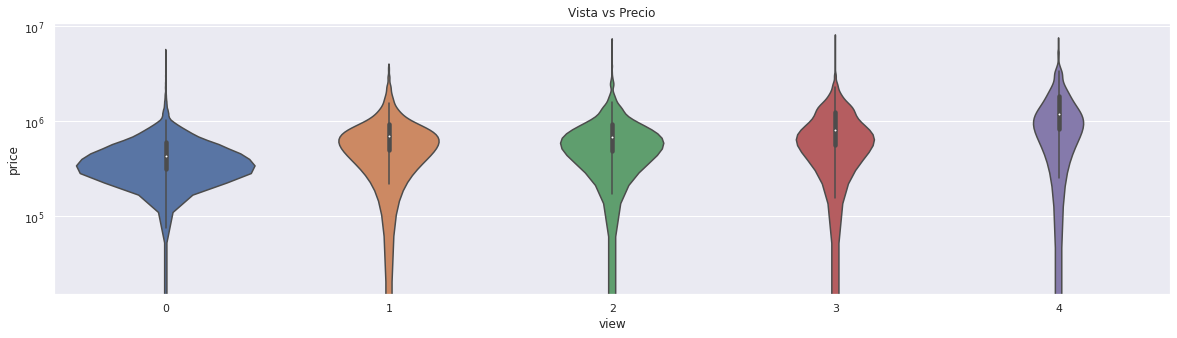

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.violinplot(x="view", y="price", data=df_data)
plt.title("Vista vs Precio")
plt.show()

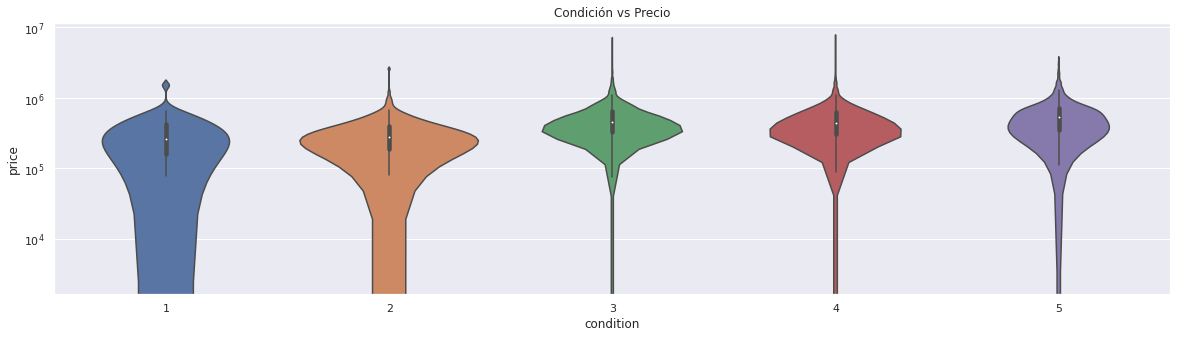

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.violinplot(x="condition", y="price", data=df_data)
plt.title("Condici√≥n vs Precio")
plt.show()

Las relaciones del precio con la vista y condici√≥n de las casas es m√°s tenue de lo inicialmente esperado. Caba destacar que las casas con mala condicion (1 o 2) tienen una alta frecuencia de precios bajos, a pesar de que sus mediene no est√© tan lejos de la de casas con puntaje 3.

###Puntuaci√≥n

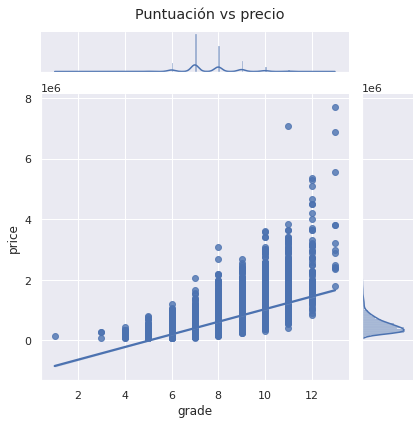

In [ ]:
p = sns.jointplot("grade", "price", data=df_data, kind='reg');
p.fig.suptitle("Puntuaci√≥n vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

Aqu√≠ la relaci√≥n entre puntuaci√≥n y precio es bastante clara.

### Tama√±o pisos superiores y subterraneo

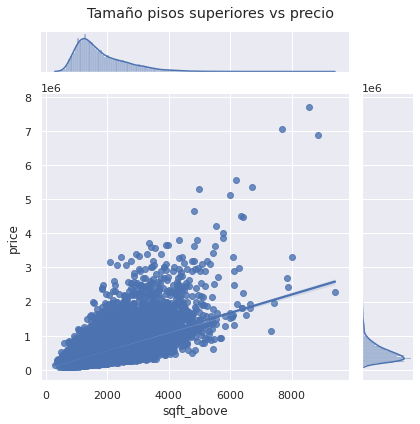

In [ ]:
p = sns.jointplot("sqft_above", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o pisos superiores vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

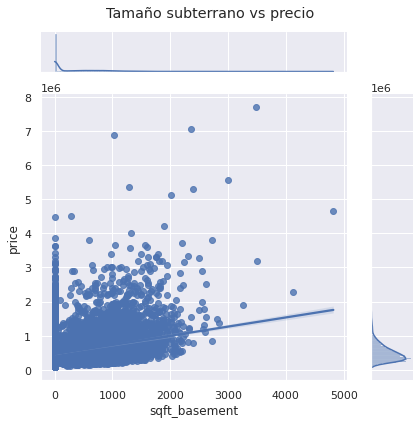

In [ ]:
p = sns.jointplot("sqft_basement", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o subterrano vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

La relaci√≥n es m√°s clara para los pisos superiores, mientras que para el tama√±o de los subterraneos, si bien hay una relaci√≥n con el precio, tambi√©n existe una alta cantidad de outliers.

###Tama√±o vecinos

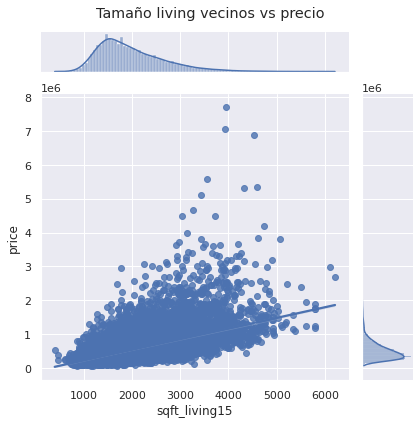

In [ ]:
p = sns.jointplot("sqft_living15", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o living vecinos vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

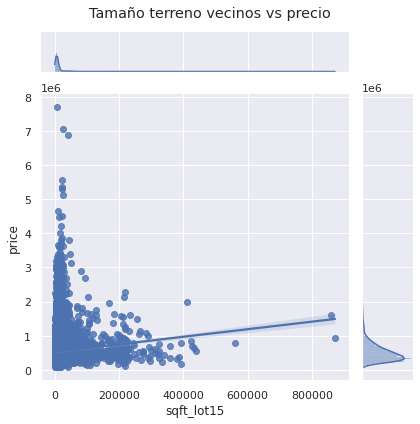

In [ ]:
p = sns.jointplot("sqft_lot15", "price", data=df_data, kind='reg');
p.fig.suptitle("Tama√±o terreno vecinos vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

Ambos gr√°ficos son muy similares a los de tama√±os para la casa misma, por lo que se espera que las casas en un miusmo vecindario tengan valores similares (y tama√±os similares).

###Waterfront

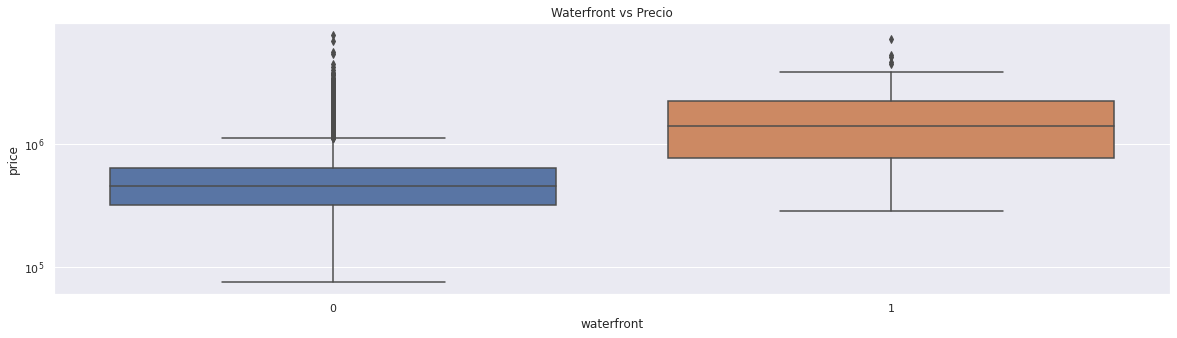

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.boxplot(x="waterfront", y="price", data=df_data)
plt.title("Waterfront vs Precio")
plt.show()

Los departamentos o casas con vista al mar tienen un valor considerablemente m√°s alto en promedio que los que no.

##Divisi√≥n datos y preprocesamiento

**Divida la data en training/validation/testing considerando un split 80/10/10 y realice un preprocesamiento a la data** [2 Pts] 

Viendo las features del dataset, la √∫nica que no se considerara √∫til para el entrenamiento es el `id`, por lo que se eliminara dicha columna para el training, adem√°s de separar la columna `price`, ya que es el target. 

En cuanto al resto, se usara standard scaler para `sqft_living, sqft_lot, sqft_above. sqft_basement, sfqt_living15 y sqft_lot15`, ya que indican valores continuos que indican un tama√±o.

Se usar√° minmax scaler para `lat, long y zipcode`, ya que los valores var√≠an mucho para un encoding con labels, y se espera una distribuci√≥n diferente a una normal.

Las variables `bedrooms, bathrooms, floors, view, condition, grade, yr_built y yr_renovated` son discretas, con caracter√≠stica ordinal, por lo que se usar√° ordinal encoding.

Como `waterfront` es una varialbe binaria, se usar√° label encoding.

Finalmente, `date` se dividir√° en `yr_sold y month sold`, las cuales tendr√°n ordinal y cos/sin encoding respectivamente, ya que la primera es ordinal, mientras que la segunda es c√≠clica (`month_sold` quedar√° como `cos_month y sin_month`). 

In [ ]:
StandardList = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15' , 'sqft_lot15']
MinMaxList = ['lat', 'long' , 'zipcode']
OrdinalList = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'yr_sold']
LabelList = ['waterfront']
CycleList = ['cos_month', 'sin_month']

def preprocess_month(df, column):
  MONTHS_IN_YEAR = 12
  df['sin_month'] = np.sin(2 * np.pi * df[column] / MONTHS_IN_YEAR)
  df['cos_month'] = np.cos(2 * np.pi * df[column] / MONTHS_IN_YEAR)
  df.drop(columns=[column], inplace=True)
  return df

def process_data(df_data):
    #process the date column
    yr_col = df_data['date'].copy()
    yr_col = yr_col.apply(lambda x: int(x[0:4]))
    month_col = df_data['date'].copy()
    month_col = month_col.apply(lambda x: int(x[4:6]))

    #Add new columns and drop unnecessary ones
    df_data['yr_sold'] = yr_col
    df_data['month_sold'] = month_col
    preprocess_month(df_data, 'month_sold')
    df_data = df_data.drop(columns=['id', 'date'], inplace=False)

    #split into train, validation and test data
    df_train, df_not_train = train_test_split(df_data, test_size=0.2, random_state=SEED)
    df_val, df_test = train_test_split(df_not_train, test_size=0.5, random_state=SEED)

    #Standard Scale
    scaler = StandardScaler()
    for col in StandardList: 
      scaler.fit(df_train[[col]])
      df_train[[col]] = scaler.transform(df_train[[col]])
      df_val[[col]] = scaler.transform(df_val[[col]])
      df_test[[col]] = scaler.transform(df_test[[col]])

    #MinMax Scale
    scaler = MinMaxScaler()
    for col in MinMaxList: 
      scaler.fit(df_train[[col]])
      df_train[[col]] = scaler.transform(df_train[[col]])
      df_val[[col]] = scaler.transform(df_val[[col]])
      df_test[[col]] = scaler.transform(df_test[[col]])

    #Ordinal Encode
    encoder = OrdinalEncoder()
    for col in OrdinalList:
      encoder.fit(df_data[col].values.reshape(-1,1))
      df_train[col] = encoder.transform(df_train[col].values.reshape(-1,1))
      df_val[col] = encoder.transform(df_val[col].values.reshape(-1,1))
      df_test[col] = encoder.transform(df_test[col].values.reshape(-1,1))

    #Label Encode
    encoder = LabelEncoder()
    for col in LabelList:
      encoder.fit(df_train[col])
      df_train[col] = encoder.transform(df_train[col])
      df_val[col] = encoder.transform(df_val[col])
      df_test[col] = encoder.transform(df_test[col])

    return df_train, df_val, df_test

def split_data(df):
    X = df.drop(columns='price', inplace=False)
    y = df['price'].to_numpy(copy=True)
    return X, y

df_train, df_val, df_test = process_data(df_data)

## Formas de crear una red neuronal

Existen tres formas distintas para crear una red neuronal utilizando `Tensorflow`:


1.   `Sequential API`
2.   `Functional API`
3.   `Model Subclassing`


Ordenados de menor a mayor en t√©rminos de flexibilidad, pero con el costo de trabajar a m√°s bajo nivel.




### ¬øC√≥mo preparar la data para utilizarla en una red neuronal?


Antes de crear la red aprenderemos a c√≥mo preparar la data para ser utilizada posteriormente. Si bien existen m√∫ltiples formas, veremos el est√°ndar que tiene Google en sus [tutoriales](https://www.tensorflow.org/tutorials) de `Tensorflow`. Lo cual consiste en hacer uso de [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/DatasetSpec)

**Siga los pasos indicados a continuaci√≥n considerando la data** [1 Pts]

Separe cada dataframe en features y target.


In [ ]:
X_train, y_train = split_data(df_train)
X_val, y_val = split_data(df_val)
X_test, y_test = split_data(df_test)

Crear los dataset de entrenamiento, validacion y testing utilizando `tf.data.Dataset.from_tensor_slices` considerando como par√°metro la tupla X, y. Ejemplo: `tf.data.Dataset.from_tensor_slices(X_train.values, y_train.values)`


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

Podemos mostrar la estructura del dataset con un print o bien llamando a la variable.

In [ ]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(21,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

Tambi√©n podemos mostrar un elemento en espec√≠fico del dataset.

In [ ]:
for (X, y) in train_dataset:
  print(X)
  print(y)
  break

tf.Tensor(
[ 3.00000000e+00  1.20000000e+01  5.42513540e-01 -1.26326421e-01
  1.00000000e+00  0.00000000e+00  1.00000000e+00  3.00000000e+00
  7.00000000e+00 -3.44500603e-02  1.18620832e+00  7.80000000e+01
  0.00000000e+00  1.31313131e-01  6.03989062e-01  3.86212625e-01
  2.20573173e-01 -8.63801601e-02  1.00000000e+00  1.00000000e+00
  6.12323400e-17], shape=(21,), dtype=float64)
tf.Tensor(688888.0, shape=(), dtype=float64)


`Tensorflow` funciona en base a tensores. Un `tensor` no es m√°s ni menos que una matriz con cero o m√°s dimensiones. Un `tensor` de dimension cero se llama escalar


En este caso vamos a mostrar tensores de 0, 1 y 2 dimensiones para comprender como varia el valor de shape en cada caso.

In [ ]:
tensor_zero_dimension = tf.Variable(1, tf.int32)
tensor_zero_dimension 

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

Si el `tensor` es un escalar entonces vamos a tener `shape=()`.

In [ ]:
tensor_one_dimension = tf.Variable([2, 3], tf.int32)
tensor_one_dimension

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([2, 3], dtype=int32)>

Si el `tensor` es de una dimension vamos a tener `shape=(2, )` lo que indica que tenemos un `tensor` con una dimension y dos elementos.

In [ ]:
tensor_two_dimension = tf.Variable([[1, 2], [2, 3]], tf.int32)
tensor_two_dimension

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [2, 3]], dtype=int32)>

Si el `tensor` es de dos dimensiones vamos a tener `shape=(2, 2)` lo que indica que tenemos un `tensor` con dos dimension y dos elementos.


En conclusi√≥n si tenemos `shape=(x, y)` el valor `x` corresponde a la cantidad de elementos que existe en el tensor e `y` corresponde a la dimensionalidad de este. Cuando `shape=()` significa que tenemos un escalar lo que es igual a tener un tensor de dimensionalidad cero.

En caso de que queramos obtener el valor de un `Tensor` como usualmente se aprecia en `numpy`, tenemos que utilizar `X.numpy()` o bien `y.numpy()`.

In [ ]:
for (X, y) in train_dataset:
  print(X.numpy())
  print(y.numpy())
  break

[ 3.00000000e+00  1.20000000e+01  5.42513540e-01 -1.26326421e-01
  1.00000000e+00  0.00000000e+00  1.00000000e+00  3.00000000e+00
  7.00000000e+00 -3.44500603e-02  1.18620832e+00  7.80000000e+01
  0.00000000e+00  1.31313131e-01  6.03989062e-01  3.86212625e-01
  2.20573173e-01 -8.63801601e-02  1.00000000e+00  1.00000000e+00
  6.12323400e-17]
688888.0


Continuando con el tutorial de la preparaci√≥n de la data, el primer paso es tener el dataset en la forma de tupla `(X, y)`. Como ya tenemos el dataset de la forma correcta, el siguiente paso es preparar el dataset para ser usado por la red neuronal. Para ello utilicen la siguiente funcion:

In [ ]:
def preprocess_dataset(dataset, batch_size, size):
  """Preprocess dataset.

    :param dataset: Dataset para prepararlo para el entrenamiento
    :type dataset: tensorflow.python.data.ops.dataset_ops.TensorSliceDataset
    :param batch_size: Tamano del batch a utilizar para entrenamiento
    :type batch_size: int
    :param table_name: Tamano del dataset
    :type table_name: int
    :return: Dataset listo para ser usado por la red neuronal
    :rtype: tensorflow.python.data.ops.dataset_ops.TensorSliceDataset
  """

  AUTOTUNE = tf.data.AUTOTUNE

  dataset = dataset.shuffle(size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.prefetch(buffer_size=AUTOTUNE)
  dataset = dataset.cache()

  return dataset

**De que sirve la funcion anterior** [1 Pts] 




`Comentario`: Sirve para:
1.   Setear el `batch size`, que es la cantidad de muestras que pasar√°n a la vez por .
2.   Setear el dataset para que elija el buffer del `prefetching` (datos del batch siguiente que se leer√°n mientras se ejecuta el paso actual) de manera din√°mica con `AUTOTUNE` de tensorflow.
3.   Reordena los datos del dataset de manera aleatoria, usando el buffer `size`.

In [ ]:
p_train = preprocess_dataset(train_dataset, 100, SEED)
p_val = preprocess_dataset(val_dataset, 100, SEED)
p_test = preprocess_dataset(test_dataset, 100, SEED)

**Explique el significado del tamano del batch (`batch size`) en la implementaci√≥n moderna del algoritmo BP (`back-propagation`). ¬øQu√© valor recomendar√≠a si su conjunto de entrenamiento es de 10.000 ejemplos? ¬øQu√© valor recomendar√≠a si su conjunto de entrenamiento es de 1.000.000 de ejemplos?** [1 Pts]

`Respuesta:` `batch size` es la cantidad de muestras que pasar√°n a la vez por la red. Este valor no depende del tama√±o del dataset, sino que de la capacidad del computador usado, y el tiempo en el que se quiere entrenar la red, por lo que en ambos casos recomendar√≠a el mismo batch-size, el cual dependera del computador y tiempo disponible.

Finalmente, tenemos listo el dataset para ser utilizado por la red neuronal.

### Sequential API

Crear y entrenar una red neuronal que tenga:


*   1 capa de entrada (Identifique que dimensiones deber√≠a tener)
*   3 capas ocultas con 16 neuronas cada una y con funcion de activaci√≥n `ReLu`
*   1 capa de salida con 1 neurona con funcion de activaci√≥n por defecto (`linear`)


Usando [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model) [2 Pts]




*Para ello se puede apoyar en la funci√≥n [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) de `Tensorflow`.*

```
model = Sequential([
  Input(..., name=''),
  Dense(units=128, activation='relu', ..., name=''),
  Dense(units=128, activation='relu', ..., name=''),
  ...
  Dense(units=1, ..., name='')
])
```

Y compile el modelo utilizando model.compile de `Tensorflow` considerando como base el siguiente ejemplo:

```
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
```
Para mayor informaci√≥n se recomienda revisar el siguiente [link](https://www.tensorflow.org/guide/keras/train_and_evaluate#the_compile_method_specifying_a_loss_metrics_and_an_optimizer).

Utilizar:
* `optimizer` = `Adam(learning_rate=1e-3)` con los par√°metros por defecto
* `loss` = `Mean Squared Error`
* `metrics` = `Mean Squared Error`

In [ ]:
seq_model = Sequential(
    [
        Input(shape=(21,), name='input'),
        Dense(16, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(1, name="output"),
    ]
)

seq_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=MeanSquaredError(),
    metrics=[MeanSquaredError()],
)

**Calcule la cantidad de par√°metros entrenables de esta red y luego verifique su resultado utilizando `model.summary()`** (Cuando se pide el n√∫mero de par√°metros explicitar como llego a ese valor, que multiplicaciones o sumas tuvo que realizar) [0.5 Pts]

`N√∫mero de Par√°metros` = `22*16 + 17*16 + 17*16 + 17*1` = `352 + 272 + 272 + 17`  = `913`.

Para calcular el n√∫meros de par√°metros entrenables se calcula un valor entre cada capa y la siguiente, el cual es `(n+1 * m)` con `n` igual al valor de neuronas en la primera capa usado para el c√°lculo, y `m` la cantidad de nodos en la siguiente. Se suma 1 a `n`, debido a que se deben considerar los bias de cada capa. 

In [ ]:
seq_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 16)                352       
                                                                 
 layer2 (Dense)              (None, 16)                272       
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


**Muestre la estructura de la red utilizando la funci√≥n `tf.keras.utils.plot_model`** [1 Pts]

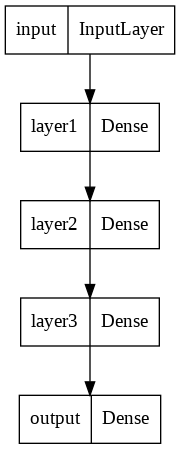

In [ ]:
tf.keras.utils.plot_model(seq_model)


#### ¬øC√≥mo crear funciones de perdida?

Para probar los siguientes apartados vamos a crear un dataset muy sencillo que corresponde a 100 datos extra√≠dos de la siguiente ecuaci√≥n:

$$y = 2x + 1$$

e intentaremos predecir $x=100$, lo cual deber√≠a ser $y=201$ o muy cercano a este valor.

In [ ]:
# Create a dummy dataset
x = tf.linspace(start=1, stop=100, num=100)
y = tf.multiply(x, 2) + 1

`Tensorflow` da bastante flexibilidad y podemos crear las funciones de p√©rdidas que queramos, en este caso creare la funcion de RMSE.


In [ ]:
# With subclassing
class MyCustomRMSEV1(Loss):

  def __init__(self, **kwargs):
    super(MyCustomRMSEV1, self).__init__(**kwargs)

  def call(self, y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_pred - y_true))
    rmse = tf.math.sqrt(mse)
    return rmse

In [ ]:
model = Sequential([Dense(units=1, input_shape=[1])])
model.compile(optimizer='adam', loss=MyCustomRMSEV1())
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([101.0])}")

Prediction [[203.01099]]


In [ ]:
# Without subclassing
def MyCustomRMSEV2():

  def loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_pred - y_true))
    rmse = tf.math.sqrt(mse)
    return rmse

  return loss

In [ ]:
model = Sequential([Dense(units=1, input_shape=[1])])
model.compile(optimizer='adam', loss=MyCustomRMSEV2())
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([101.0])}")

Prediction [[202.99008]]


En la versi√≥n que no utiliza subclassign le podemos pasar par√°metros adicionales a la funcion, como por ejemplo:


In [ ]:
def MyCustomRMSEV3(factor):

  def loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_pred - y_true))
    rmse = tf.math.sqrt(mse)
    return rmse / factor

  return loss

In [ ]:
model = Sequential([Dense(units=1, input_shape=[1])])
model.compile(optimizer='adam', loss=MyCustomRMSEV3(factor=100))
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([101.0])}")

Prediction [[202.96544]]


**Existe una funcion de perdida para regresi√≥n llamada Huber, investigar c√≥mo se calcula, implem√©ntela usando `Tensorflow` y prediga el valor para $x=100$ considerando el dataset dummy creado anteriormente** [1 Pts]




`Huber`: 

$   
L_\delta(y,f(x)) = 
     \begin{cases}
       \frac{1}{2}(y-f(x))^2 &\quad\text{cuando }|y-f(x)|\le \delta\\
       \ \delta |y-f(x)|-\frac{1}{2}\delta^2&\quad\text{en cualquier otro caso} \\ 
     \end{cases}
$

In [ ]:
def MyCustomHuberLoss(delta):

  def loss(y_true, y_pred):
    absolute = tf.reduce_mean(tf.math.abs(y_true - y_pred))
    if absolute < delta:
        return tf.reduce_mean(tf.square(y_pred - y_true))
    else:
        return delta * absolute - 0.5 * delta**2

  return loss

model = Sequential([Dense(units=1, input_shape=[1])])
model.compile(optimizer='adam', loss=MyCustomHuberLoss(delta=0.5))
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([100.0])}")

Prediction [[200.38802]]


#### ¬øC√≥mo crear funciones de activaci√≥n?

Tambi√©n podemos crear funciones de activaci√≥n utilizando `Tensorflow`. Para ello se muestra el ejemplo de la funcion de activaci√≥n sigmoidal.

In [ ]:
def MySigmoid(x):
  return 1/ (1 + tf.math.exp(-x))

model = Sequential([Dense(units=1, input_shape=[1], activation=MySigmoid)])
model.compile(optimizer='adam', loss=MyCustomHuberLoss(delta=0.5))
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([100.0])}")

Prediction [[1.]]


**Identifique la expresi√≥n matem√°tica que computa la funcion de activaci√≥n `LeakyRelu` e implem√©ntela utilizando `Tensorflow`. Utilice como funcion de activaci√≥n `LeakyRelu` con cualquier valor de `alpha` y prediga el valor para $x=100$ considerando el dataset dummy creado anteriormente** [1 Pts]


In [ ]:
def MyLeakyRelu(x, alpha=0.1):
    return K.switch(x >= 0, x, alpha*x)

model = Sequential([Dense(units=1, input_shape=[1], activation=MyLeakyRelu)])
model.compile(optimizer='adam', loss=MyCustomHuberLoss(delta=0.5))
model.fit(x, y, epochs=1000, verbose=0)

print(f"Prediction {model.predict([100.0])}")


Prediction [[201.00002]]


`LeakyRelu`:

$   
f_\alpha(y) = 
     \begin{cases}
       \ y &\quad\text{cuando } y\ge0\\
       \ \alpha y&\quad\text{cuando } y < 0 \\ 
     \end{cases}
$

#### ¬øC√≥mo crear capas personalizadas?

Para crear capas personalizadas tenemos que hacer subclassing a la clase `Layer`. En este caso se replica parte de la capa `Dense` que utilizamos anteriormente.

In [ ]:
class MyCustomDenseV1(Layer):

  def __init__(self, units=16, activation=None):
    """Inicializar los atributos de la instancia"""
    super(MyCustomDenseV1, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)

  def build(self, input_shape):
    """Crear el 'template' de la capa (pesos)"""
     # Initialize the weights
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name="kernel",
                        initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                        trainable=True)
    b_init = tf.zeros_initializer()
    # Initialize the biases
    self.b = tf.Variable(name="bias",
                         initial_value=b_init(shape=(self.units, ), dtype='float32'),
                         trainable=True)
  
  def call(self, inputs):
    """Definir la operaciones que realiza la capa desde inputs a outputs"""
    return self.activation(tf.matmul(inputs, self.w) + self.b)

In [ ]:
model = Sequential([Input(shape=(1, )), MyCustomDenseV1(units=1)])
model.compile(optimizer=Adam(learning_rate=1e-3), loss=MyCustomRMSEV3(factor=10))
model.fit(x, y, epochs=500, verbose=0)

print(f"Prediction {model.predict([101.0])}")

**Crear una capa densa con el nombre `MyCustomDenseV2` que compute lo siguiente: [1 Pts]
$$y = ax^3 * bx^2 - cx + d $$** 
Esto puede que no tenga mucho sentido en la pr√°ctica, es solo para que se familiaricen un poco con el c√≥digo.

Utilice su capa `MyCustomDenseV2` y prediga el valor para $x=100$ considerando el dataset dummy creado anteriormente

In [ ]:
class MyCustomDenseV2(Layer):

  def __init__(self, units=16, activation=None):
    """Inicializar los atributos de la instancia"""
    super(MyCustomDenseV2, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)

  def build(self, input_shape):
    """Crear el 'template' de la capa (pesos)"""
     # Initialize the weights
    weight_init = tf.random_normal_initializer()
    self.a = tf.Variable(name="kernel1",
                        initial_value=weight_init(shape=(input_shape[-1], self.units), dtype='float32'),
                        trainable=True)
    self.b = tf.Variable(name="kernel2",
                        initial_value=weight_init(shape=(input_shape[-1], self.units), dtype='float32'),
                        trainable=True)
    self.c = tf.Variable(name="kernel3",
                        initial_value=weight_init(shape=(input_shape[-1], self.units), dtype='float32'),
                        trainable=True)
    d_init = tf.zeros_initializer()
    # Initialize the biases
    self.d = tf.Variable(name="bias",
                         initial_value=d_init(shape=(self.units, ), dtype='float32'),
                         trainable=True)
  
  def call(self, inputs):
    """Definir la operaciones que realiza la capa desde inputs a outputs"""
    return self.activation(tf.matmul(inputs, tf.pow(self.a, 3)) + tf.matmul(inputs, tf.pow(self.b, 2)) - tf.matmul(inputs, self.c) + self.d)

In [ ]:
model = Sequential([Input(shape=(1, )), MyCustomDenseV2(units=1)])
model.compile(optimizer=Adam(learning_rate=1e-3), loss=MyCustomRMSEV3(factor=10))
model.fit(x, y, epochs=500, verbose=0)

print(f"Prediction {model.predict([100.0])}")

**Calcular la cantidad de par√°metros de su modelo anterior. Explicar su resultado** [0.5 Pts]

`N√∫mero de par√°metros`: Ser√≠an 4, ya que se multiplican los 4 parametros (`a`, `b`, `c` y `d`),  por 1 (ya que es 1 neurona de input).

#### ¬øQu√© son los callbacks en TensorFlow?

**Existen multiples `Callbacks` dispibles en `Tensorflow` e incluso uno puede crear `Callbacks` personalizados. Defina la utilidad de los `Callbacks` y averiguar c√≥mo funciona el callback [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) y [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint). Finalmente cree una lista con ambos callbacks para posteriormente ser pasados al entrenamiento de la red** [1 Pts]

*   `Callbacks`: Sirven para llamar funciones personalizadas durante el training loop sin tener que cambiar el c√≥digo.
*   `EarlyStopping`: Early stopping es un callback que define cuando la red deber√≠a detener su entrenamiento tempranamente, en base a los par√°metros que se elijan.
*   `ModelCheckpoint`: Es un callback para guardar los pesos del modelo con una frecuencia definida.



Para `EarlyStopping` utilice los par√°metros `monitor, patience y restore_best_weights`. Elija un valor apropiado para `monitor y patience`, el par√°metro `restore_best_weights` d√©jelo en True.


Para `ModelCheckpoint` utilice los par√°metros `filepath, monitor, save_best_only y save_weights_only`. Elija un valor para los par√°metros `filepath y monitor`, los par√°metros `save_best_only, save_weights_only` d√©jelos en True.


In [ ]:
ch_path = os.path.join(path, 'checkpoint')

callbacks = [
             tf.keras.callbacks.EarlyStopping(
                monitor = 'loss', 
                patience = 3,
                restore_best_weights = True
                ), 
            tf.keras.callbacks.ModelCheckpoint(
                filepath = ch_path,
                monitor='val_loss',
                save_best_only = True,
                save_weights_only = True
                )
            ]

#### Entrenamiento de la primera red neuronal

Para entrenar una red la forma m√°s sencilla es utilizar el metodo `model.fit`. Tambi√©n se puede personalizar lo que sucede en el model.fit pero eso quedara para el siguiente curso de introducci√≥n a las redes neuronales. Si les interesa saber acerca del tema les dejo el siguiente [link](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit)

Entrene su modelo utilizando `model.fit`. Defina un numero de epoch acorde al problema, utilice los callbacks definidos anteriormente y los dataset (entrenamiento y validacion) que ya tiene listos para ser pasados por la red. Guardar el resultado en una variable, puede ser llamada `history`.

In [ ]:
history = seq_model.fit(p_train, epochs=50, callbacks=callbacks, validation_data=p_val)

Epoch 1/50
173/173 [==============================] - 2s 5ms/step - loss: 430119976960.0000 - mean_squared_error: 430210088960.0000 - val_loss: 414706368512.0000 - val_mean_squared_error: 413609754624.0000
Epoch 2/50
173/173 [==============================] - 0s 3ms/step - loss: 417851768832.0000 - mean_squared_error: 417927757824.0000 - val_loss: 382471176192.0000 - val_mean_squared_error: 381396385792.0000
Epoch 3/50
173/173 [==============================] - 1s 3ms/step - loss: 343815782400.0000 - mean_squared_error: 343851892736.0000 - val_loss: 261235343360.0000 - val_mean_squared_error: 260237574144.0000
Epoch 4/50
173/173 [==============================] - 1s 3ms/step - loss: 204235063296.0000 - mean_squared_error: 204259672064.0000 - val_loss: 142751989760.0000 - val_mean_squared_error: 141800554496.0000
Epoch 5/50
173/173 [==============================] - 0s 3ms/step - loss: 141015318528.0000 - mean_squared_error: 141057196032.0000 - val_loss: 127594577920.0000 - val_mean_squ

**Grafique las curvas de entrenamiento. Comente el grafico** [1 Pts]

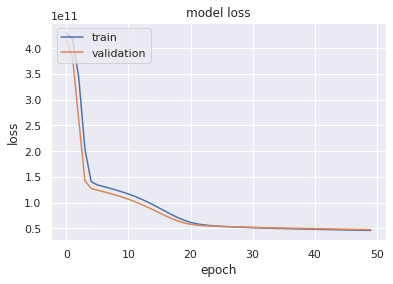

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Identifique en que parte de la siguiente figura se encuentra su entrenamiento: 

<img src="https://drive.google.com/uc?id=1kecseaITvJeG45WNePflLn_u3sOYUyq4" width="50%"/>

**En caso de que se encuentre en la parte izquierda o derecha que tiene que recomendar√≠a hacer?** [1 Pts]

`Respuesta`Se encuentra a la izquierda, ya que la validation loss sigue bajando. Para este caso recomendar√≠a hacer m√°s √©pocas.

**Compute el resultado de su modelo para el conjunto de testing** [1 Pts]

In [ ]:
seq_model.predict(p_test)

array([[ 436715.22],
       [1056261.  ],
       [ 280954.06],
       ...,
       [ 437603.6 ],
       [ 359381.8 ],
       [ 154989.94]], dtype=float32)

#### ¬øC√≥mo seteamos los hiperpar√°metros en una red neuronal?

**Para setear los hiperpar√°metros en `Tensorflow` tenemos algo que se llama [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). Investigue como utilizarlo y encuentre los mejores hiperpar√°metros para su modelo anterior** [2 Pts]

In [ ]:
def model_builder(hp):
    model = Sequential()
    model.add(Input(shape=(21,), name="input"))

    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dense(units=hp_units, activation='relu'))
    Dense(units=1, activation='linear', name='output')

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss=MeanSquaredError(),
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(model_builder,
                    seed=SEED,
                    objective='val_accuracy',
                    max_epochs=10,
                    factor=3,
                    directory=path,
                    project_name='tuner')

tuner.search(p_train, epochs=50, validation_data=p_val, callbacks=callbacks)

**Muestre los mejores hiperpar√°metros obtenidos para la red neuronal, cree de nuevo la red y reentr√©nela usando los mejores hiperpar√°metros. Muestre las curvas de entrenamiento y finalmente eval√∫e su red con el conjunto de testing** [1 Pts]


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print('Neuronas por layer =', best_hps.get('units'))
print('Learning rate =', best_hps.get('learning_rate'))


Neuronas por layer = 288
Learning rate = 0.001


In [ ]:
seq_model_2 = model_builder(best_hps)
seq_model_2.fit(p_train, epochs=50, validation_data=p_val, callbacks=callbacks)

Epoch 1/50
173/173 [==============================] - 2s 11ms/step - loss: 405123825664.0000 - accuracy: 0.0000e+00 - val_loss: 303996338176.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
173/173 [==============================] - 2s 9ms/step - loss: 213609512960.0000 - accuracy: 0.0000e+00 - val_loss: 171288477696.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
173/173 [==============================] - 2s 9ms/step - loss: 176780345344.0000 - accuracy: 0.0000e+00 - val_loss: 163596976128.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
173/173 [==============================] - 2s 10ms/step - loss: 168592752640.0000 - accuracy: 0.0000e+00 - val_loss: 155158003712.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
173/173 [==============================] - 2s 9ms/step - loss: 159033802752.0000 - accuracy: 0.0000e+00 - val_loss: 145267490816.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
173/173 [==============================] - 2s 10ms/step - loss: 147561791488.0000 - accuracy: 0.0000e+00 - val_loss: 1338683965

In [ ]:
results = seq_model_2.evaluate(p_test, batch_size=100)
print("test loss:", results[0])
print("test acc:", results[1])

22/22 [==============================] - 0s 4ms/step - loss: 88877400064.0000 - accuracy: 0.0000e+00
test loss: 88877400064.0
test acc: 0.0


### Functional API

#### Entrenamiento

Crear y entrenar una red neuronal que tenga:


*   1 capa de entrada (Identifique que dimensiones deber√≠a tener)
*   3 capas ocultas con 16 neuronas cada una y con funcion de activaci√≥n `ReLu`
*   1 capa de salida con 1 neurona con funcion de activaci√≥n por defecto (`linear`)


usando [Functional API](https://www.tensorflow.org/guide/keras/functional?hl=es-419) [2 Pts]


Compilar el modelo de la misma forma que en el apartado de `Sequential API`

In [ ]:
visible = Input(shape=(21,))
hidden1 = Dense(16, activation='relu')(visible)
hidden2 = Dense(16, activation='relu')(hidden1)
hidden3 = Dense(16, activation='relu')(hidden2)
output = Dense(1, activation='linear')(hidden3)
fun_model = Model(inputs=visible, outputs=output)

fun_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=MeanSquaredError(),
    metrics=[MeanSquaredError()],
)

**Compruebe que al utilizar `Functional API` se obtiene la misma cantidad de par√°metros entrenables que cuando se utiliza `Sequential API`. Realice el entrenamiento de modelo**  [1 Pts]


In [ ]:
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_20 (Dense)            (None, 16)                352       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fun_history = fun_model.fit(p_train, epochs=50, callbacks=callbacks, validation_data=p_val)

Epoch 1/50
173/173 [==============================] - 1s 3ms/step - loss: 430442479616.0000 - mean_squared_error: 430533246976.0000 - val_loss: 415941132288.0000 - val_mean_squared_error: 414843535360.0000
Epoch 2/50
173/173 [==============================] - 0s 3ms/step - loss: 422188449792.0000 - mean_squared_error: 422267748352.0000 - val_loss: 390924533760.0000 - val_mean_squared_error: 389848006656.0000
Epoch 3/50
173/173 [==============================] - 0s 2ms/step - loss: 355539124224.0000 - mean_squared_error: 355577659392.0000 - val_loss: 274571902976.0000 - val_mean_squared_error: 273576427520.0000
Epoch 4/50
173/173 [==============================] - 0s 3ms/step - loss: 213303066624.0000 - mean_squared_error: 213325348864.0000 - val_loss: 145485414400.0000 - val_mean_squared_error: 144542908416.0000
Epoch 5/50
173/173 [==============================] - 0s 3ms/step - loss: 140484018176.0000 - mean_squared_error: 140524879872.0000 - val_loss: 126010998784.0000 - val_mean_squ

**Grafique la curva de entrenamiento y comente los resultados** [0.5 Pts]

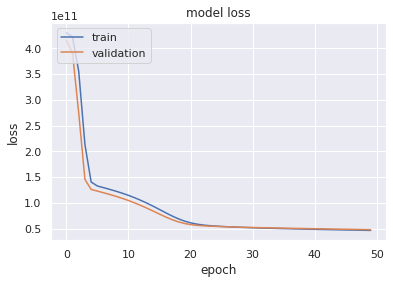

In [ ]:
plt.plot(fun_history.history['loss'])
plt.plot(fun_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Se ve practicamente igual al gr√°fico de `Sequential API`

Parece bastante similar `Sequential API` y `Functional API` la diferencia es que con `Functional API` podemos tener modelos m√°s complejos que tengan por ejemplo skip connections o bien que tengan m√∫ltiples entradas y/o salidas (**Lo que puede o no servir para el desaf√≠o**)

**Investigar la utilidad de las skip connections en redes neuronales y agregue algunas skip connections al modelo anterior, puede agregar m√°s capas si lo requiere** [2 Pts]

`Skip Connections`: Las `skip connections` son conexiones que se saltan una layer, lo cual puede servir para resolver diversos problemas, como en las Redes residuales, que sirven para resolver el problema de degradaci√≥n, mientras que en las Redes densas asegura la reutilizaci√≥n de features.

In [ ]:
from keras.layers.merge import concatenate

inputs = Input(shape=(21,), name='input')
hidden1 = Dense(units=16, activation='relu', name='hidden1')(inputs)
hidden2 = Dense(units=16, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(units=16, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(units=16, activation='relu', name='hidden4')(hidden3)
merge = concatenate([hidden3, hidden2], name='concatenate')
outputs = Dense(units=1, activation='linear', name='output')(merge)
skip_model = Model(inputs=inputs, outputs=outputs, name="skip_fun_model")

skip_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=MeanSquaredError(),
    metrics=[MeanSquaredError()],
)

**Muestre que su modelo si cuenta con skip connections utilizando `tf.keras.utils.plot_model`** [0.5 Pts]

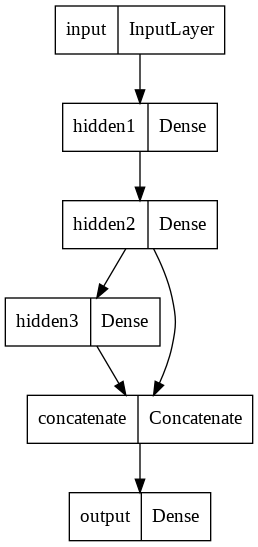

In [ ]:
tf.keras.utils.plot_model(skip_model)

**Entrene este modelo, grafique las curvas de entrenamiento y eval√∫e el modelo con el conjunto de testing** [0.5 Pts]


In [ ]:
skip_history = skip_model.fit(p_train, epochs=50, callbacks=callbacks, validation_data=p_val)

Epoch 1/50
173/173 [==============================] - 1s 4ms/step - loss: 430025375744.0000 - mean_squared_error: 430115553280.0000 - val_loss: 414329667584.0000 - val_mean_squared_error: 413232791552.0000
Epoch 2/50
173/173 [==============================] - 0s 3ms/step - loss: 415635374080.0000 - mean_squared_error: 415709102080.0000 - val_loss: 377091588096.0000 - val_mean_squared_error: 376019255296.0000
Epoch 3/50
173/173 [==============================] - 0s 3ms/step - loss: 334325219328.0000 - mean_squared_error: 334359101440.0000 - val_loss: 250273316864.0000 - val_mean_squared_error: 249278447616.0000
Epoch 4/50
173/173 [==============================] - 0s 3ms/step - loss: 197994348544.0000 - mean_squared_error: 198021709824.0000 - val_loss: 141987086336.0000 - val_mean_squared_error: 141029457920.0000
Epoch 5/50
173/173 [==============================] - 0s 2ms/step - loss: 141891256320.0000 - mean_squared_error: 141933920256.0000 - val_loss: 128988946432.0000 - val_mean_squ

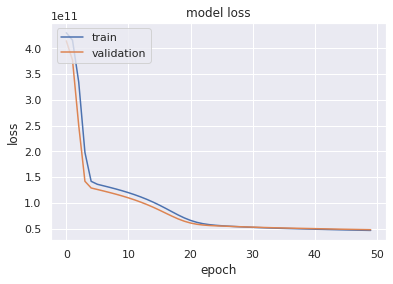

In [ ]:
plt.plot(skip_history.history['loss'])
plt.plot(skip_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Evaluaci√≥n

In [ ]:
results = skip_model.evaluate(p_test, batch_size=100)
print("test loss:", results[0])
print("test acc:", results[1])

22/22 [==============================] - 0s 2ms/step - loss: 40826671104.0000 - mean_squared_error: 40584556544.0000
test loss: 40826671104.0
test acc: 40584556544.0


### Model Subclassing

#### Entrenamiento

Crear y entrenar una red neuronal que tenga:


*   1 capa de entrada (Identifique que dimensiones deber√≠a tener)
*   3 capas ocultas con 16 neuronas cada una y con funcion de activaci√≥n `ReLu`
*   1 capa de salida con 1 neurona con funcion de activaci√≥n por defecto (`linear`)


usando [Model Subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models) [2 Pts]

In [ ]:
class SubclassModel(Model):
    def __init__(self, name="subclass",**kwargs):
        super(SubclassModel, self).__init__(name=name,**kwargs)
        self.layer1 = Dense(16, activation='relu', name='hidden1')
        self.layer2 = Dense(16, activation='relu', name='hidden2')
        self.layer3 = Dense(16, activation='relu', name='hidden3')
        self.out = Dense(1, activation='linear', name='output')

    def call(self, inputs):
        a = self.layer1(inputs)
        b = self.layer2(a)
        c = self.layer3(b)
        out = self.out(c)
        return out

sub_model = SubclassModel()

sub_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=MeanSquaredError(),
    metrics=[MeanSquaredError()],
)

Parece nuevamente que es lo mismo, pero la diferencia en este caso es que con esto podemos customizar el entrenamiento y muchas cosas m√°s del modelo, pero hay que pagar el precio de trabajar a m√°s bajo nivel.

**Entrene este modelo, grafique las curvas de entrenamiento y eval√∫e el modelo con el conjunto de testing. Comente los resultados** [0.5 Pts]

In [ ]:
sub_history = skip_model.fit(p_train, epochs=50, callbacks=callbacks, validation_data=p_val)

Epoch 1/50
173/173 [==============================] - 0s 3ms/step - loss: 46442287104.0000 - mean_squared_error: 46458195968.0000 - val_loss: 47857721344.0000 - val_mean_squared_error: 47727255552.0000
Epoch 2/50
173/173 [==============================] - 1s 3ms/step - loss: 46218059776.0000 - mean_squared_error: 46233989120.0000 - val_loss: 47665242112.0000 - val_mean_squared_error: 47536467968.0000
Epoch 3/50
173/173 [==============================] - 1s 3ms/step - loss: 45997539328.0000 - mean_squared_error: 46013485056.0000 - val_loss: 47476617216.0000 - val_mean_squared_error: 47349440512.0000
Epoch 4/50
173/173 [==============================] - 1s 3ms/step - loss: 45780525056.0000 - mean_squared_error: 45796503552.0000 - val_loss: 47288356864.0000 - val_mean_squared_error: 47162699776.0000
Epoch 5/50
173/173 [==============================] - 1s 3ms/step - loss: 45566619648.0000 - mean_squared_error: 45582573568.0000 - val_loss: 47100964864.0000 - val_mean_squared_error: 4697651

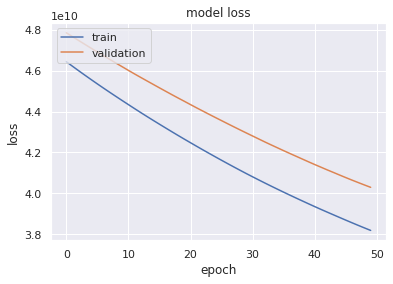

In [ ]:
plt.plot(sub_history.history['loss'])
plt.plot(sub_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Evaluaci√≥n

In [ ]:
results = sub_model.evaluate(p_test, batch_size=100)
print("test loss:", results[0])
print("test acc:", results[1])

22/22 [==============================] - 0s 2ms/step - loss: 403667189760.0000 - mean_squared_error: 402963431424.0000
test loss: 403667189760.0
test acc: 402963431424.0


# 1.2) Ensamblados üìä



T√≠picamente son tres los m√©todos m√°s comunes de ensamblado: `Bagging`, `Boosting` y `Stacking`.

**Defina cada uno de los m√©todos mencionados anteriormente** [2 Pts]


* `Bagging`: Genera datos adicionales para el entrenamiento a partir del dataset original, usando combinaciones con repeticiones para generer multisets del mismo tama√±o que los datos originales. Se usa para reducir la varianza del entrenamiento.
* `Boosting`: Consiste de 2 pasos. El primero usa un subconjunto de los datos originales para generar una serie de modelos, y luego los mejora al combinarlos usando una funcion de costo particular.
* `Stacking`: Es similar a boosting, ya que genera varios modelos. La diferencia est√° en que no solo usa la formula emp√≠rica para la funcion de pesos, sino que usa otro modelo para estimar el input y output de cada modelo para estimar los pesos, i.e. determinar que modelos tendran un buen o mal rendimiento dependiento de los datos de input.

## Redes neuronales

**Cree un ensamblado de tipo `Bagging` utilizando los modelos creados con `Sequential API`, `Functional API` y `Model Subclassing`. Muestre el ensamble utilizando `tf.keras.utils.plot_model`, entr√©nelo, grafique las curvas de entrenamiento y eval√∫elo en el conjunto de testing. Comente los resultados** [4 Pts]

Recuerde congelar los par√°metros de estos modelos luego de ser entrenados para ser utilizados en el ensamble, utilice `model.trainable=False` para congelar los par√°metros.

In [ ]:
seq_copy = seq_model
fun_copy = fun_model
sub_copy = sub_model

model_list = [seq_copy, fun_copy, sub_copy]

def evaluate_model(X_train, y_train, X_val, y_val, model):
    # encode targets
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

    p_train = preprocess_dataset(train_dataset, 100, SEED)
    p_val = preprocess_dataset(val_dataset, 100, SEED)

    history = model.fit(p_train, epochs=50, callbacks=callbacks, validation_data=p_val)
    # evaluate the model
    scores = model.evaluate(p_test, batch_size=100)
    return model, scores[0], scores[1]

def ensemble_predictions(members, test_data):
    # make predictions
    yhats = [model.predict(test_data) for model in members]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.argmax(summed, axis=1)
    return result

losses, accs, models = list(), list(), list()
for model in model_list:
    # select indexes
    ix = [i for i in range(len(X_train))]
    train_ix = resample(ix, replace=True, n_samples=4500)
    test_ix = [x for x in ix if x not in train_ix]
    # select data
    trainX, trainy = X_train[train_ix], y_train[train_ix]
    testX, testy = X_train[test_ix], y_train[test_ix]
    # evaluate model
    new_model, loss, acc = evaluate_model(trainX, trainy, testX, testy, model)
    losses.append(loss)
    accs.append(acc)
    models.append(new_model)

print('loss:', np.mean(losses))
print('accuracy:', np.mean(accs))
print('prediction:\n',ensemble_predictions(models, p_test))



seq_copy.trainable = False
fun_copy.trainable = False
sub_copy.trainable = False

KeyError: ignored

## Modelos cl√°sicos (Random Forest, XGBoost y CatBoost)

**Realizar un ensamble de tipo `Stacking` considerando el mismo dataset de house prediction. Para ello entrene 3 modelos distintos: `Random Forest`, `XGBoost` y `CatBoost`. Eval√∫e el ensamble en el conjunto de testing y comente los resultados** [4 Pts]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

models_to_train = [XGBRegressor(), CatBoostRegressor(), RandomForestRegressor()]

estimators = [
    ('xgbr', XGBRegressor()),
    ('cbr', CatBoostRegressor(random_state=SEED))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, random_state=SEED))

In [ ]:
score = reg.fit(X_train, y_train).score(X_test, y_test)

Streaming output truncated to the last 5000 lines.
4:	learn: 308928.2985889	total: 30ms	remaining: 5.96s
5:	learn: 298627.1629771	total: 35.6ms	remaining: 5.9s
6:	learn: 288848.5399515	total: 42.1ms	remaining: 5.97s
7:	learn: 280024.3178890	total: 48.3ms	remaining: 5.99s
8:	learn: 271920.1535889	total: 54.6ms	remaining: 6.01s
9:	learn: 263576.1582358	total: 60.4ms	remaining: 5.98s
10:	learn: 256385.8715595	total: 66.6ms	remaining: 5.99s
11:	learn: 249638.0811043	total: 72.2ms	remaining: 5.95s
12:	learn: 242932.0374638	total: 78ms	remaining: 5.92s
13:	learn: 236732.3721389	total: 83.7ms	remaining: 5.9s
14:	learn: 231044.1592146	total: 89.8ms	remaining: 5.89s
15:	learn: 226198.2656618	total: 95.7ms	remaining: 5.89s
16:	learn: 220803.1142844	total: 101ms	remaining: 5.87s
17:	learn: 215694.1100717	total: 108ms	remaining: 5.89s
18:	learn: 211040.8676818	total: 116ms	remaining: 5.96s
19:	learn: 205813.9370640	total: 121ms	remaining: 5.92s
20:	learn: 201921.3286684	total: 126ms	remaining: 5.8

Los resultados se ven un poco mejores que los obtenidos con las redes creadas anteriormente.

# 2) Desaf√≠o üèÜ



[House Price Prediction](https://www.kaggle.com/t/82ab64ccf77248e9bce30924e6f58459)

<img src="https://drive.google.com/uc?id=1ep729kaGruTMz7Iz6MSnWrfyAy-y4OL9" width="60%"/>


**La nota de este apartado se har√° en base a la posici√≥n del ranking obtenido en la plataforma `Kaggle`** [60 Pts]

*Todo el c√≥digo tiene que estar presente en ese apartado incluyendo la generaci√≥n del archivo para subirlo a la plataforma, pueden agregar la cantidad de celdas que requieran y se valora que incluyan comentarios a los resultados obtenidos* 

---
**Utilizar todo lo aprendido en las tareas incluyendo esta √∫ltima**

In [ ]:
path = ""
PATH_TO_CSV2 = os.path.join(path, "house_train.csv")
df_data2 = pd.read_csv(PATH_TO_CSV2)

PATH_TO_CSV3 = os.path.join(path, "house_test.csv")


df_data3 = pd.read_csv(PATH_TO_CSV3)

In [ ]:
df_data2.dtypes

property_id           int64
room                float64
layout_type          object
property_type        object
locality             object
price                 int64
area                  int64
furnish_type         object
bathroom              int64
city                 object
parking_spaces        int64
floor               float64
pet_friendly          int64
power_backup        float64
washing_machine       int64
air_conditioner       int64
geyser/solar          int64
security_deposit      int64
cctv/security       float64
lift                float64
neighbourhood         int64
dtype: object

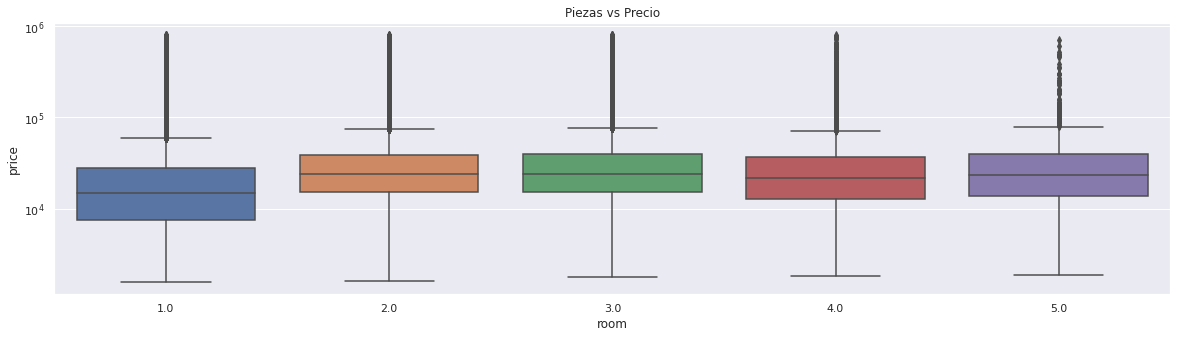

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.boxplot(x="room", y="price", data=df_data2)
plt.title("Piezas vs Precio")
plt.show()

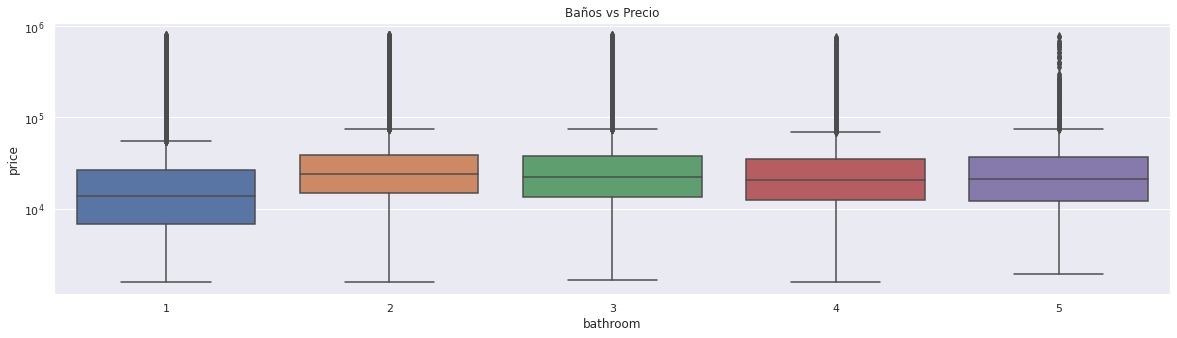

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.boxplot(x="bathroom", y="price", data=df_data2)
plt.title("Ba√±os vs Precio")
plt.show()

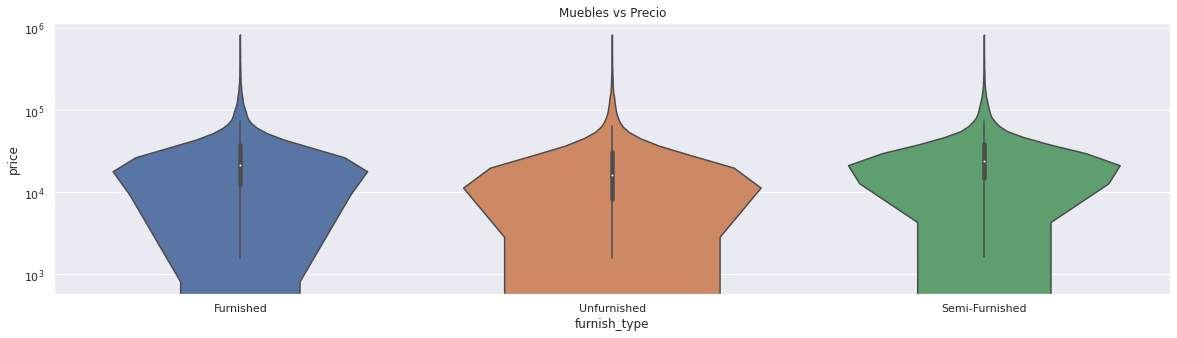

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.violinplot(x="furnish_type", y="price", data=df_data2)
plt.title("Muebles vs Precio")
plt.show()

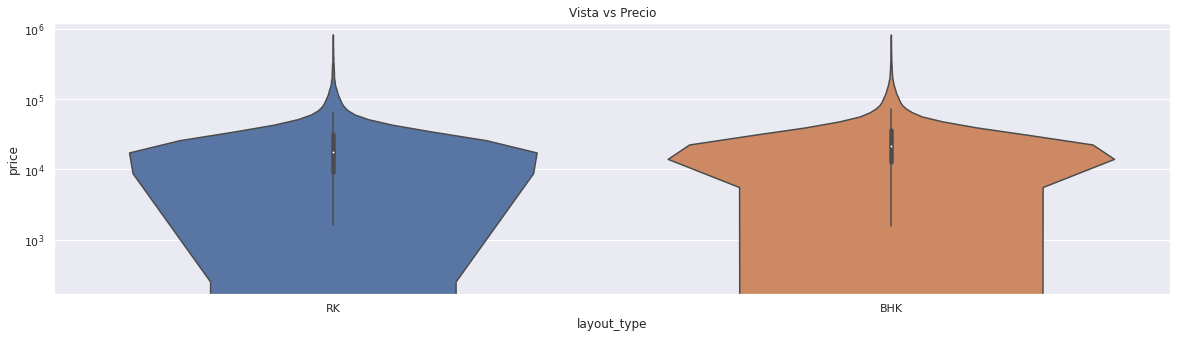

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plt.yscale('log')
sns.violinplot(x="layout_type", y="price", data=df_data2)
plt.title("Vista vs Precio")
plt.show()

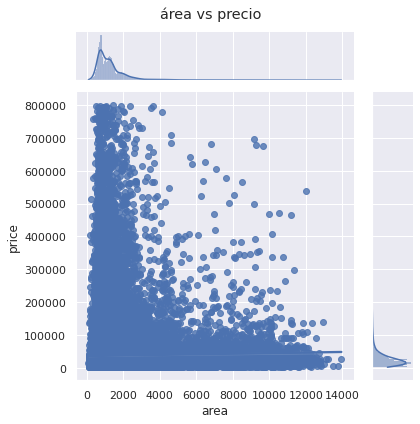

In [ ]:
p = sns.jointplot("area", "price", data=df_data2, kind='reg');
p.fig.suptitle("√°rea vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

Extra√±amente no existe una relaci√≥n clara entre estas variables.

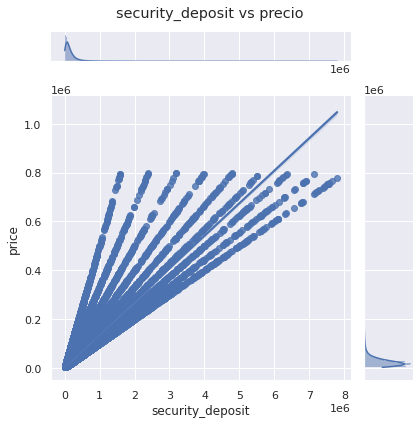

In [ ]:
p = sns.jointplot("security_deposit", "price", data=df_data2, kind='reg');
p.fig.suptitle("security_deposit vs precio")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

se observa una  relaci√≥n pero una particularidad de su forma.

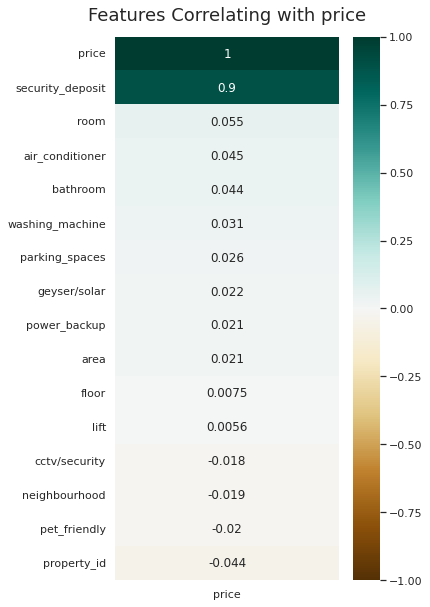

In [ ]:
corrMatrix = df_data2.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

In [ ]:
### START CODE HERE ###
StandardList = ['security_deposit',"area"]
MinMaxList = []
OrdinalList = ['layout_type',"lift",'cctv/security','parking_spaces','pet_friendly','power_backup','washing_machine',"air_conditioner","geyser/solar"]
LabelList = ['room', 'bathroom', 'floor', 'layout_type', 'furnish_type', 'city']
CycleList = ['cos_month', 'sin_month']

def process_data(df_data,df_test):

    df_data = df_data.drop(columns=["locality", 'property_type'],axis=1)
    df_test = df_test.drop(columns=["locality", 'property_type'],axis=1)

    #split into train, validation and test data
    df_train, df_val = train_test_split(df_data, test_size=0.2, random_state=SEED)
    # df_val, df_test = train_test_split(df_not_train, test_size=0.5, random_state=SEED)

    #Standard Scale
    scaler = StandardScaler()
    for col in StandardList: 
      scaler.fit(df_train[[col]])
      df_train[[col]] = scaler.transform(df_train[[col]])
      df_val[[col]] = scaler.transform(df_val[[col]])
      df_test[[col]] = scaler.transform(df_test[[col]])

    #MinMax Scale
    scaler = MinMaxScaler()
    for col in MinMaxList: 
      scaler.fit(df_train[[col]])
      df_train[[col]] = scaler.transform(df_train[[col]])
      df_val[[col]] = scaler.transform(df_val[[col]])
      df_test[[col]] = scaler.transform(df_test[[col]])

    #Ordinal Encode
    encoder = OrdinalEncoder()
    for col in OrdinalList:
      if col == "furnish_type":
        X = [['Semi-Furnished', 2], ['Unfurnished', 1], ['Furnished', 3]]
        encoder.fit(X)
        df_train[col] = encoder.transform(df_train[col])
        df_val[col] = encoder.transform(df_val[col])
        df_test[col] = encoder.transform(df_test[col])
      else:
        encoder.fit(df_data[col].values.reshape(-1,1))
        df_train[col] = encoder.transform(df_train[col].values.reshape(-1,1))
        df_val[col] = encoder.transform(df_val[col].values.reshape(-1,1))
        df_test[col] = encoder.transform(df_test[col].values.reshape(-1,1))

    #Label Encode
    encoder = LabelEncoder()
    for col in LabelList:
      
      encoder.fit(df_train[col])
      df_train[col] = encoder.transform(df_train[col])
      df_val[col] = encoder.transform(df_val[col])
      df_test[col] = encoder.transform(df_test[col])

    return df_train, df_val, df_test

def split_data(df):
    X = df.drop(columns='price', inplace=False)
    y = df['price'].to_numpy(copy=True)
    return X, y

df_train2, df_val2, df_test3 = process_data(df_data2,df_data3)

Se opt√≥ por eliminar las columnas ciudad y property type, ciudad es debido a que entre las diferentes particiones de la data no siempre exxistian todas la ciudades presentes en cada una de esta data.

In [ ]:
X_train2, y_train2 = split_data(df_train2)
X_val2, y_val2 = split_data(df_val2)
# X_test2, y_test2 = split_data(df_test2)

In [ ]:
from xgboost import XGBRegressor

from catboost import CatBoostRegressor
from catboost import Pool

xgbr = XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

# Next, we'll fit the model with train data.

xgbr.fit(X_train2, y_train2)

XGBRegressor(verbosity=0)


XGBRegressor(verbosity=0)

In [ ]:
score = xgbr.score(X_train2, y_train2)  
print("Training score: ", score)

Training score:  0.8323718819732285


In [ ]:
from sklearn.metrics import r2_score

ypred = xgbr.predict(X_val2)
mse = mean_squared_error(y_val2, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
r2 = r2_score(y_val2, ypred)
print('R2: {:.2f}'.format(r2))

MSE: 753372241.12
RMSE: 27447.63
R2: 0.80


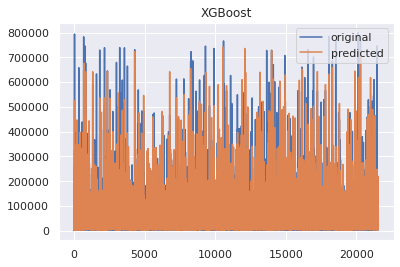

In [ ]:
x_ax = range(len(y_val2))
plt.plot(x_ax, y_val2, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("XGBoost")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

train_dataset = Pool(X_train2, y_train2) 
test_dataset = Pool(X_val2, y_val2)
modelCat = CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [200],
        'learning_rate': [0.03, 0.1],
        'depth': [ 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1]}
modelCat.grid_search(grid, train_dataset)

0:	learn: 70612.4234695	test: 72563.6290171	best: 72563.6290171 (0)	total: 82ms	remaining: 16.3s
1:	learn: 68935.9005436	test: 70843.9133211	best: 70843.9133211 (1)	total: 98.7ms	remaining: 9.77s
2:	learn: 67276.6084430	test: 69144.3094825	best: 69144.3094825 (2)	total: 112ms	remaining: 7.33s
3:	learn: 65723.8686330	test: 67555.4762098	best: 67555.4762098 (3)	total: 142ms	remaining: 6.96s
4:	learn: 64192.7478931	test: 65986.8365093	best: 65986.8365093 (4)	total: 157ms	remaining: 6.14s
5:	learn: 62701.8175337	test: 64463.9692927	best: 64463.9692927 (5)	total: 172ms	remaining: 5.57s
6:	learn: 61266.2773922	test: 62996.4480976	best: 62996.4480976 (6)	total: 187ms	remaining: 5.15s
7:	learn: 59891.9216748	test: 61586.4297381	best: 61586.4297381 (7)	total: 206ms	remaining: 4.95s
8:	learn: 58552.0464860	test: 60212.5360636	best: 60212.5360636 (8)	total: 221ms	remaining: 4.69s
9:	learn: 57241.9124747	test: 58851.9079311	best: 58851.9079311 (9)	total: 236ms	remaining: 4.47s
10:	learn: 55983.577

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
pred = modelCat.predict(X_val2)
rmse = (np.sqrt(mean_squared_error(y_val2, pred)))
r2 = r2_score(y_val2, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 27855.91
R2: 0.80


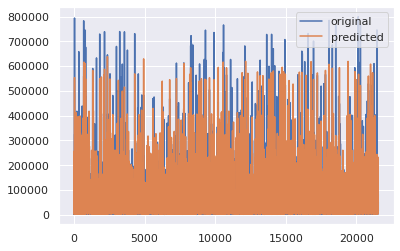

In [ ]:
pred = modelCat.predict(X_val2)
x_ax = range(len(y_val2))
plt.plot(x_ax, y_val2, label="original")
plt.plot(x_ax, pred, label="predicted")
# plt.title("Cat")
plt.legend()
plt.show()

In [ ]:
import csv
pred = modelCat.predict(df_test3)
submission = []
i=0
fields = ["property_id","price"]
for value in df_test3["property_id"]:
  submission.append( [value, pred[i] ])
  i+=1
with open('GFG', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(submission)